In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores("VADER Sentiment looks interesting, I have high hopes!")
print(vs)

{'neg': 0.0, 'neu': 0.463, 'pos': 0.537, 'compound': 0.6996}


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Amazon_raw_predicted_by_VADER.csv')

In [4]:
del df['Unnamed: 0']

In [5]:
df

,Text,Score,compound_score,positive_score,negative_score
0,I have bought several of the Vitality canned d...,5,0.9441,0.305,0.000
1,Product arrived labeled as Jumbo Salted Peanut...,1,-0.5664,0.000,0.138
2,This is a confection that has been around a fe...,4,0.8265,0.155,0.091
3,If you are looking for the secret ingredient i...,2,0.0000,0.000,0.000
4,Great taffy at a great price. There was a wid...,5,0.9468,0.448,0.000
5,I got a wild hair for taffy and ordered this f...,4,0.8830,0.163,0.029
6,This saltwater taffy had great flavors and was...,5,0.9346,0.273,0.034
7,This taffy is so good. It is very soft and ch...,5,0.9487,0.480,0.000
8,Right now I'm mostly just sprouting this so my...,5,0.6369,0.149,0.000
9,This is a very healthy dog food. Good for thei...,5,0.8313,0.295,0.000


In [6]:
pd.set_option('display.max_columns', False)

In [7]:
df.groupby('Score').describe()

compound_score                      ...   positive_score              
               count      mean       std  ...              50%    75%    max
Score                                     ...                               
1            52268.0  0.036345  0.641807  ...            0.090  0.137  0.593
2            29769.0  0.271401  0.607884  ...            0.109  0.158  0.516
3            42640.0  0.482640  0.528985  ...            0.128  0.182  0.642
4            80655.0  0.704241  0.385240  ...            0.172  0.238  0.684
5           363122.0  0.772515  0.316567  ...            0.209  0.285  0.964

[5 rows x 24 columns]

In [1]:
# counts, bin_edges = np.histogram(data, bins=5)
# print(counts)

In [9]:
VADER_score = df['compound_score']

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

(array([ 11285.,  13316.,  13456.,  13151.,  18215.,  13174.,  23832.,
         41826.,  87703., 332496.]),
 array([-9.9940e-01, -7.9947e-01, -5.9954e-01, -3.9961e-01, -1.9968e-01,
         2.5000e-04,  2.0018e-01,  4.0011e-01,  6.0004e-01,  7.9997e-01,
         9.9990e-01]),
 <a list of 10 Patch objects>)

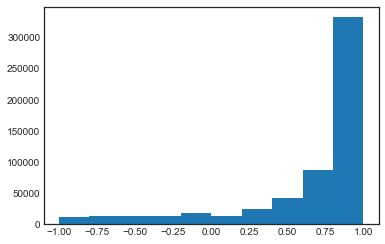

In [11]:
plt.hist(VADER_score)

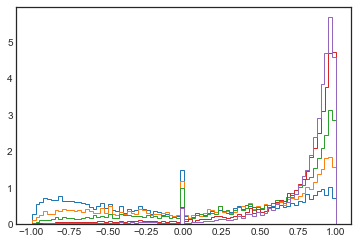

In [14]:
x1 = df[df['Score']==1]['compound_score']
x2 = df[df['Score']==2]['compound_score']
x3 = df[df['Score']==3]['compound_score']
x4 = df[df['Score']==4]['compound_score']
x5 = df[df['Score']==5]['compound_score']


kwargs = dict(histtype='step', alpha=1, density = True, bins=80)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)
plt.hist(x4, **kwargs)
plt.hist(x5, **kwargs);

In [30]:
type(df['Score'][5])

numpy.int64

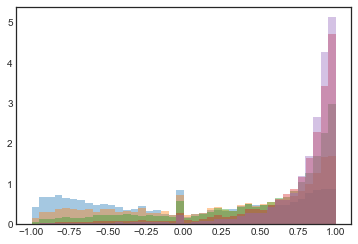

In [42]:
x1 = df[df['Score']==1]['compound_score']
x2 = df[df['Score']==2]['compound_score']
x3 = df[df['Score']==3]['compound_score']
x4 = df[df['Score']==4]['compound_score']
x5 = df[df['Score']==5]['compound_score']


kwargs = dict(histtype='stepfilled', alpha=0.4, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)
plt.hist(x4, **kwargs)
plt.hist(x5, **kwargs);

In [67]:
counts, bin_edges = np.histogram(df['compound_score'], bins=20)
print(counts)

[  4664   6621   6763   6553   6819   6637   6123   7028   5835  12380
   5116   8058  10888  12944  19284  22542  33992  53711 108401 224095]


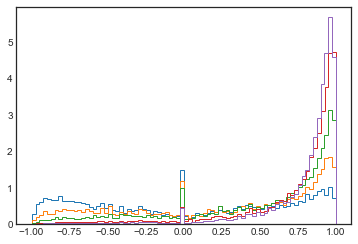

In [57]:
x1 = df[df['Score']==1]['compound_score']
x2 = df[df['Score']==2]['compound_score']
x3 = df[df['Score']==3]['compound_score']
x4 = df[df['Score']==4]['compound_score']
x5 = df[df['Score']==5]['compound_score']


kwargs = dict(histtype='step', alpha=1, normed=True, bins=80)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)
plt.hist(x4, **kwargs)
plt.hist(x5, **kwargs);

(array([0.01043665, 0.02584312, 0.03926167, 0.03677675, 0.04820737,
        0.04025564, 0.0531772 , 0.05566211, 0.0501953 , 0.04969832,
        0.06112893, 0.05367418, 0.06013496, 0.06908066, 0.05566211,
        0.07057161, 0.06311686, 0.08945697, 0.09641473, 0.06460781,
        0.08051127, 0.07305652, 0.06709273, 0.09790568, 0.07504446,
        0.08597809, 0.07951731, 0.07703239, 0.12325182, 0.10287551,
        0.10138456, 0.07902032, 0.10188155, 0.07007463, 0.09045094,
        0.07504446, 0.07802636, 0.07802636, 0.06411083, 0.47710383,
        0.07703239, 0.14064623, 0.059141  , 0.10784535, 0.15008891,
        0.13219752, 0.15008891, 0.20127818, 0.22364242, 0.22861225,
        0.2037631 , 0.16301048, 0.18736265, 0.22662432, 0.27234677,
        0.22066052, 0.33745157, 0.43784216, 0.30962051, 0.42641155,
        0.33993648, 0.37522229, 0.47660685, 0.48356461, 0.59985867,
        0.6639695 , 0.64011431, 0.85133215, 0.8056097 , 0.94377102,
        1.10827245, 1.22804539, 1.45019686, 1.83

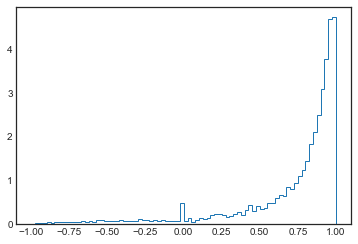

In [27]:
x1 = df[df['Score']==4]['compound_score']

kwargs = dict(histtype='step', alpha=1, normed=True, bins=80)

plt.hist(x1, **kwargs)


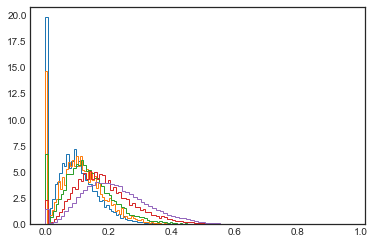

In [23]:
x1 = df[df['Score']==1]['positive_score']
x2 = df[df['Score']==2]['positive_score']
x3 = df[df['Score']==3]['positive_score']
x4 = df[df['Score']==4]['positive_score']
x5 = df[df['Score']==5]['positive_score']


kwargs = dict(histtype='step', alpha=1, normed=True, bins=80)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)
plt.hist(x4, **kwargs)
plt.hist(x5, **kwargs);

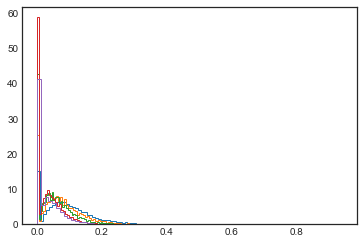

In [16]:
x1 = df[df['Score']==1]['negative_score']
x2 = df[df['Score']==2]['negative_score']
x3 = df[df['Score']==3]['negative_score']
x4 = df[df['Score']==4]['negative_score']
x5 = df[df['Score']==5]['negative_score']


kwargs = dict(histtype='step', alpha=1, normed=True, bins=80)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)
plt.hist(x4, **kwargs)
plt.hist(x5, **kwargs);

In [59]:
df.columns

Index(['Text', 'Score', 'compound_score', 'positive_score', 'negative_score'], dtype='object')

In [81]:
#del df['calculate_Star']

In [ ]:
# positive sentiment: compound score >= 0.05
# neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# negative sentiment: compound score <= -0.05


In [79]:
# Prediction 

def calculate_Star(row):
    if row['compound_score']>=0.05:
        if row['compound_score']>0.185:
            return 5
        else:
            return 4
    
    elif (row['compound_score']> -0.05) and (row['compound_score']< 0.05):   
        return 3

    
    elif row['compound_score']<= -0.05:
        if row['negative_score']>0.108:
            return 1
        else:
            return 2
    
df['calculate_Star'] = df.apply(calculate_Star,axis=1)


In [78]:
df.groupby('Score').describe()

calculate_Star                           ...   positive_score                     
               count      mean       std  min  ...              25%    50%    75%    max
Score                                          ...                                      
1            52268.0  0.534993  0.498779  0.0  ...            0.047  0.090  0.137  0.593
2            29769.0  0.681078  0.466067  0.0  ...            0.066  0.109  0.158  0.516
3            42640.0  0.812008  0.390711  0.0  ...            0.084  0.128  0.182  0.642
4            80655.0  0.931474  0.252649  0.0  ...            0.119  0.172  0.238  0.684
5           363122.0  0.961162  0.193209  0.0  ...            0.145  0.209  0.285  0.964

[5 rows x 32 columns]

# Show Prediction Accuracy

In [83]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [84]:
# def decode(datum):
#     return np.argmax(datum)

In [85]:
# for i in range(Y_test.shape[0]):
#     datum = Y_test[i]
#     print('index: %d' % i)
#     print('encoded datum: %s' % datum)
#     decoded_datum = decode(Y_test[i])
#     print('decoded datum: %s' % decoded_datum)
#     print()

In [86]:
# Y_test = np.array([decode(i) for i in Y_test])

In [87]:
# yhat_probs = model.predict(X_test, verbose=0)
# # predict crisp classes for test set
# yhat_classes = model.predict_classes(X_test, verbose=0)

In [173]:
yhat_classes

array([ 4,  6,  2, ...,  3, 10,  4])

In [90]:
Y_test.unique()

array([5, 1, 4, 2, 3])

In [91]:
yhat_classes.unique()

array([5, 1, 3, 2, 4])

In [88]:
Y_test = df['Score']

In [89]:
yhat_classes = df['calculate_Star']

In [92]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, yhat_classes)
print('Accuracy: %f' % accuracy)

Accuracy: 0.639709


In [93]:
f1_score(Y_test, yhat_classes, average='macro') 

0.27833943791139115

In [94]:
f1_score(Y_test, yhat_classes, average='micro') 

0.6397087539185229

In [95]:
f1_score(Y_test, yhat_classes, average=None) 

array([0.36347303, 0.13550974, 0.05765088, 0.03316343, 0.80190011])

In [96]:
f1_score(Y_test, yhat_classes, average='weighted') 

0.5617914548687525

In [97]:
unique_elements, counts_elements = np.unique(Y_test, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[     1      2      3      4      5]
 [ 52268  29769  42640  80655 363122]]


In [98]:
unique_elements, counts_elements = np.unique(yhat_classes, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[     1      2      3      4      5]
 [ 36784  22611  12138   9987 486934]]


In [99]:
# confusion matrix
matrix = confusion_matrix(Y_test, yhat_classes)
print(matrix)

[[ 16184   7622   2703   2037  23722]
 [  5637   3549   1392   1238  17953]
 [  4235   3411   1579   1426  31989]
 [  2920   2369   1423   1503  72440]
 [  7808   5660   5041   3783 340830]]


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

df = pd.read_csv("Reviews_2.csv")
df = df[['Text','Score']]


analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores("VADER Sentiment looks interesting, I have high hopes!")
print(vs)

print(df.head())

print(vs['compound'])
print(vs['pos'])
print(vs['neg'])


df['compound_score'] = None
df['positive_score'] = None
df['negative_score'] = None

for i in range(0,len(df)):
    vs = analyzer.polarity_scores(df['Text'][i])

    # Set the classification logic here !!!
    ## Do something to maximize the accuracy

    df['compound_score'][i] = vs['compound']
    df['positive_score'][i] = vs['pos']
    df['negative_score'][i] = vs['neg']



df.to_csv("Amazon_raw_predicted_by_VADER.csv")